# INTELIGENCIA ARTIFICIAL (1INF24\)
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)



# <font color=blue>Preprocesamiento de datos: Caso de Estudio</font>

---

## Integración de Técnicas de Machine Learning para la Predicción y Análisis de la contaminación del Aire en Lima metropolitana

El presente trabajo aborda la problemática de la contaminación del aire en diversos distritos de Lima, Perú, donde la alta densidad vehicular, la actividad industrial y la quema de residuos contribuyen a altos niveles de partículas en suspensión y gases tóxicos. El objetivo principal fue desarrollar un modelo predictivo de la calidad del aire utilizando técnicas de machine learning como árboles de decisión, regresión y análisis de componentes principales (PCA) para obtener predicciones precisas y analizar las dinámicas entre contaminantes y factores meteorológicos. Se tienen la siguiente base de datos con información relevante para el proceso de análisis:

1.   <font color=blue>estaciones_filtradas.csv</font>: Tabla con informacion general de contamincación por estaciones ubicadas en distritos de interés.



## Diccionario de datos

**estaciones_filtradas.csv** tiene los siguientes campos:

*   ESTACION: Nombre de estación de monitoreo automático de la calidad del aire.
*   ANO: Año en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   MES: Mes en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   DIA: Día en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   HORA: Hora en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   PM 10: Material Particulado menor a 10 micras (PM10).
*   PM 2.5: Material Particulado menor a 2.5 micras (PM2.5).
*   SO2: Dioxido de azufre (SO2).
*   NO2: Dioxido de nitrógeno (NO2).
*   O3: Ozono.
*   CO: Monoxido de carbono.

## Cargando datos

In [1]:
import pandas as pd
import numpy as np

# Importamos la información de la tabla Maestro Clientes.
df_contaminantes = pd.read_csv('estaciones_filtradas.csv', sep = ',')
print('Se leyo un dataset de dimensiones {}'.format(df_contaminantes.shape))
df_contaminantes.head()

Se leyo un dataset de dimensiones (98568, 11)


,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO
0,ATE,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5
1,ATE,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5
2,ATE,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0
3,ATE,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8
4,ATE,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5


## Verificando los tipos de datos de las columnas y haciendo correcciones si necesario
Revisamos que los tipos de datos sean los esperados, sino los corregimos

In [2]:
df_contaminantes.dtypes

ESTACION     object
ANO           int64
MES           int64
DIA           int64
HORA          int64
PM 10       float64
PM 2.5      float64
SO2         float64
NO2         float64
O3          float64
CO          float64
dtype: object

## Lidiando con nulos y dropeando columnas que no sean de utilidad  

Buscamos los valores nulos. Los mostramos en porcentaje del total de información.

In [3]:
df_contaminantes.columns

Index(['ESTACION', 'ANO', 'MES', 'DIA', 'HORA', 'PM 10', 'PM 2.5', 'SO2',
       'NO2', 'O3', 'CO'],
      dtype='object')

In [ ]:
# Muestrame valores que tengan un mismo mes ,ano y distrito

In [4]:
filtro = (df_contaminantes['ANO']==2019) & (df_contaminantes['MES']==2) & (df_contaminantes['ESTACION'] == "ATE")
df_filtrado = df_contaminantes[filtro]
print(df_filtrado)

      ESTACION   ANO  MES  DIA  HORA   PM 10  PM 2.5   SO2  NO2   O3      CO
18264      ATE  2019    2    1     0   40.61     NaN  14.7  NaN  5.6  2004.4
18265      ATE  2019    2    1     1  109.40     NaN  11.1  NaN  6.0  2137.8
18266      ATE  2019    2    1     2   82.90     NaN   7.4  NaN  5.5  1897.5
18267      ATE  2019    2    1     3   58.84     NaN   6.7  NaN  5.1  1808.9
18268      ATE  2019    2    1     4   37.84     NaN   6.5  NaN  5.1  1784.8
...        ...   ...  ...  ...   ...     ...     ...   ...  ...  ...     ...
18931      ATE  2019    2   28    19     NaN     NaN   NaN  NaN  5.9  1867.6
18932      ATE  2019    2   28    20     NaN     NaN   NaN  NaN  5.6  1934.3
18933      ATE  2019    2   28    21     NaN     NaN   NaN  NaN  5.7  2018.2
18934      ATE  2019    2   28    22     NaN     NaN   NaN  NaN  5.9  2250.5
18935      ATE  2019    2   28    23     NaN     NaN   NaN  NaN  5.9  2470.2

[672 rows x 11 columns]


In [5]:
df_contaminantes.shape[0]

98568

In [6]:
100*df_contaminantes.isnull().sum() / df_contaminantes.shape[0]

ESTACION     0.000000
ANO          0.000000
MES          0.000000
DIA          0.000000
HORA         0.000000
PM 10       36.538227
PM 2.5      48.188053
SO2         55.937018
NO2         44.628074
O3          37.808417
CO          44.810689
dtype: float64

In [7]:
# Observo que hay muchas filas las cuales tienen hasta 4 columnas o mas con valores NaN , entonces eliminare los registros que contengan mas de 4 columnas de
# contaminantes en cero



# Lista de columnas de contaminantes (ajusta el nombre de las columnas según tu dataset)
columnas_contaminantes = ['PM 10', 'PM 2.5', 'SO2', 'NO2', 'O3', 'CO']

# Crear una máscara que cuente cuántas columnas tienen valores cero en cada fila
mask = df_contaminantes[columnas_contaminantes].isna().sum(axis=1) > 4

# Filtrar el DataFrame, eliminando las filas donde más de 4 columnas tienen valor cero
df_contaminantes = df_contaminantes[~mask]

# Ver el resultado
print(df_contaminantes)




                     ESTACION   ANO  MES  DIA  HORA  PM 10  PM 2.5   SO2  NO2  \
0                         ATE  2017    1    1     0  421.9     NaN  54.7  NaN   
1                         ATE  2017    1    1     1  382.9     NaN  53.5  NaN   
2                         ATE  2017    1    1     2  403.4     NaN  54.2  NaN   
3                         ATE  2017    1    1     3  425.0     NaN  52.0  NaN   
4                         ATE  2017    1    1     4  289.3     NaN  47.9  NaN   
...                       ...   ...  ...  ...   ...    ...     ...   ...  ...   
98563  SAN JUAN DE LURIGANCHO  2020    9   30    19    NaN   15.03   NaN  NaN   
98564  SAN JUAN DE LURIGANCHO  2020    9   30    20    NaN   13.33   NaN  NaN   
98565  SAN JUAN DE LURIGANCHO  2020    9   30    21    NaN   20.49   NaN  NaN   
98566  SAN JUAN DE LURIGANCHO  2020    9   30    22    NaN   24.55   NaN  NaN   
98567  SAN JUAN DE LURIGANCHO  2020    9   30    23    NaN   17.77   NaN  NaN   

        O3      CO  
0     

In [ ]:
# Para realizar el imputador antes debo pasar las columnas a numericas, en este caso la estacion lo pasare a numerica
# aplicare el one-hot-encoder

In [8]:
df_contaminantes['ESTACION'].unique()

array(['ATE', 'SANTA ANITA', 'SAN JUAN DE LURIGANCHO'], dtype=object)

In [10]:
# Creamos 4 variables binarias (Norte, Sur, Centro y Lima) en base a la ubicacion del DEPARTAMENTO.
# Esta codificacion se llama one-hot encoding y es util para convertir categorias en valores numericos
df_contaminantes['ATE'] = np.where(df_contaminantes.ESTACION == 'ATE', 1, 0)
df_contaminantes['SANTA ANITA'] = np.where(df_contaminantes.ESTACION == 'SANTA ANITA', 1, 0)
df_contaminantes['SAN JUAN DE LURIGANCHO'] = np.where(df_contaminantes.ESTACION == 'SAN JUAN DE LURIGANCHO', 1, 0)


In [11]:
#Verifico que se agregaron las columnas
df_contaminantes.head()

,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO
0,ATE,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5,1,0,0
1,ATE,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5,1,0,0
2,ATE,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0,1,0,0
3,ATE,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8,1,0,0
4,ATE,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5,1,0,0


In [12]:
#Borro la columna ESTACION
df_contaminantes = df_contaminantes.drop(columns = ['ESTACION'])

In [13]:
df_contaminantes.head()

,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO
0,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5,1,0,0
1,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5,1,0,0
2,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0,1,0,0
3,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8,1,0,0
4,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5,1,0,0


In [14]:
#Librerias necesarias  para imputar datos por datos nulos

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [15]:
df_contaminantes.shape

(76739, 13)

In [16]:
100*df_contaminantes.isnull().sum() / df_contaminantes.shape[0]

ANO                        0.000000
MES                        0.000000
DIA                        0.000000
HORA                       0.000000
PM 10                     21.195220
PM 2.5                    34.175582
SO2                       43.414691
NO2                       29.047811
O3                        20.129269
CO                        29.278463
ATE                        0.000000
SANTA ANITA                0.000000
SAN JUAN DE LURIGANCHO     0.000000
dtype: float64

In [17]:
# hare una tecnica de imputador de valores

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=20, random_state=42),
    max_iter=5,  # Número de iteraciones para la imputación
    random_state=42
)

# Aplicar imputación
df_imputed = imputer.fit_transform(df_contaminantes)

# Convertir a DataFrame para visualizar el resultado
df_imputed = pd.DataFrame(df_imputed, columns=df_contaminantes.columns)

print("\nDatos imputados:")
print(df_imputed)



Datos imputados:
          ANO  MES   DIA  HORA     PM 10   PM 2.5     SO2     NO2   O3  \
0      2017.0  1.0   1.0   0.0  421.9000  255.830  54.700  37.015  1.9   
1      2017.0  1.0   1.0   1.0  382.9000  270.650  53.500  38.380  1.7   
2      2017.0  1.0   1.0   2.0  403.4000  280.360  54.200  46.520  2.1   
3      2017.0  1.0   1.0   3.0  425.0000  285.555  52.000  44.640  2.4   
4      2017.0  1.0   1.0   4.0  289.3000  171.070  47.900  36.545  1.4   
...       ...  ...   ...   ...       ...      ...     ...     ...  ...   
76734  2020.0  9.0  30.0  19.0   31.9780   15.030  23.670  23.450  3.5   
76735  2020.0  9.0  30.0  20.0   20.8800   13.330  23.465  22.145  3.6   
76736  2020.0  9.0  30.0  21.0   54.5810   20.490  23.065  11.200  3.5   
76737  2020.0  9.0  30.0  22.0   59.7975   24.550  23.425  22.695  3.7   
76738  2020.0  9.0  30.0  23.0   52.7285   17.770  23.275  16.985  3.6   

           CO  ATE  SANTA ANITA  SAN JUAN DE LURIGANCHO  
0       885.5  1.0          0.0    

d:\Anaconda\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Vemos que ya no hay nulos en nuestro dataset

In [18]:
# Verificamos en df_imputed
100*df_imputed.isnull().sum() / df_imputed.shape[0]

ANO                       0.0
MES                       0.0
DIA                       0.0
HORA                      0.0
PM 10                     0.0
PM 2.5                    0.0
SO2                       0.0
NO2                       0.0
O3                        0.0
CO                        0.0
ATE                       0.0
SANTA ANITA               0.0
SAN JUAN DE LURIGANCHO    0.0
dtype: float64

In [19]:
nombre_columna = 'SO2' 
num_ceros = (df_imputed[nombre_columna] == 0).sum()
num_ceros

0

## Corrección de valores inconsistentes y outliers

Buscamos inconsistencias en las variables. Para ello, mostramos los descriptivos estadísticos

In [20]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
ANO,76739.0,2018.230717,1.061126,2017.00,2017.000,2018.0000,2019.0000,2020.0
MES,76739.0,6.385710,3.351801,1.00,4.000,6.0000,9.0000,12.0
DIA,76739.0,15.612557,8.744100,1.00,8.000,16.0000,23.0000,31.0
HORA,76739.0,11.505284,6.919384,0.00,6.000,12.0000,18.0000,23.0
PM 10,76739.0,84.899967,50.578532,5.06,51.417,76.8100,108.1000,931.0
PM 2.5,76739.0,34.690394,22.014643,1.73,20.960,30.2905,42.7000,786.9
SO2,76739.0,16.987005,18.192930,0.10,6.400,11.0500,18.1250,193.4
NO2,76739.0,30.467481,19.150856,0.00,15.900,27.1000,40.4375,231.2
O3,76739.0,10.929292,12.912764,0.10,2.300,5.7050,14.8000,152.6
CO,76739.0,1434.078210,960.253023,21.80,715.850,1175.3000,1945.9325,5225.6


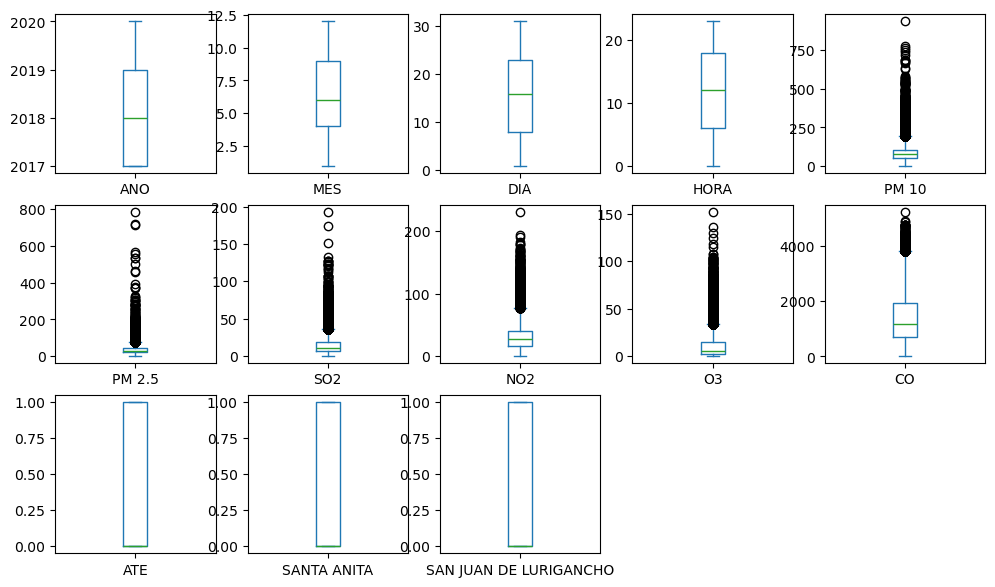

In [21]:
# Mostramos boxplots de los features
import matplotlib.pyplot as plt
df_imputed.plot(kind='box', subplots=True, layout=(3,5), sharex=True, sharey=False,  figsize=[12,7])
plt.show()

Podemos  corregir manualmente algunos outliers, usando el criterio de que usuarios no pueden ser menores de edad o mayores de 80

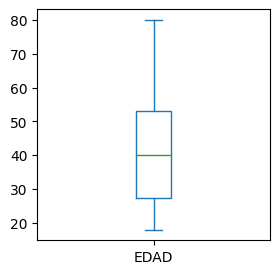

Veamos la corrección de la columna CAPDEUDA usando los valores extremos del boxplot

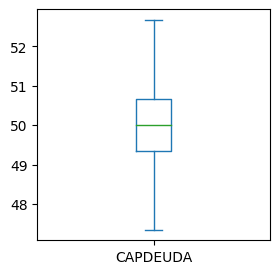

Podemos definir una funcion para generalizar la correccion de outliers hecha en CAPDEUDA a cualquier columna numerica

Cualquier valor, que esté más allá del rango de -1.5 x IQR a 1.5 x IQR es considerado outlier

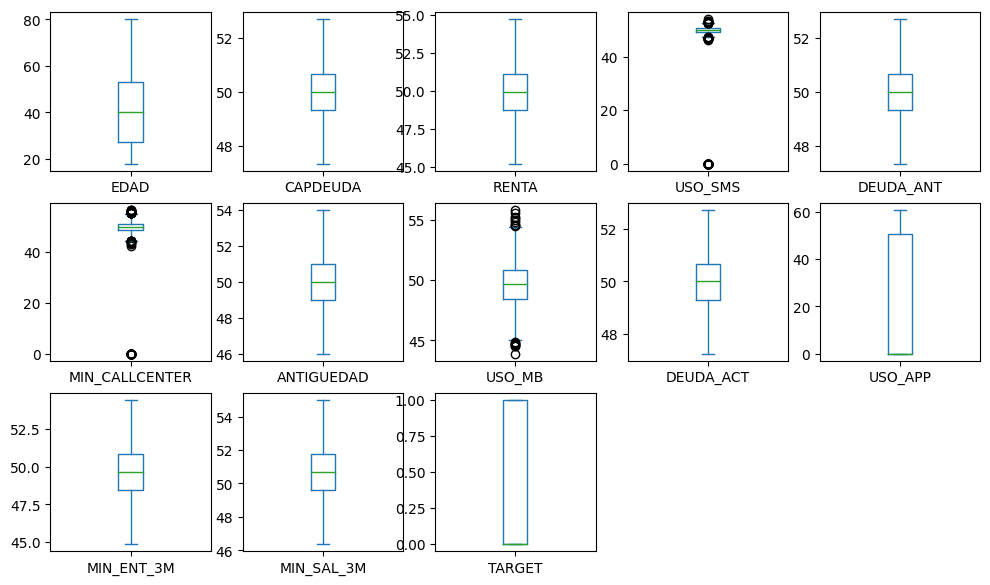

0.522134627046695

In [23]:

# Cargar el dataset (adaptar si tu archivo tiene otro formato)
data = df_imputed
# Ejemplo de tablas de rangos AQI (personalizar según normativa local o EPA)
aqi_breakpoints = {
    "PM 10": [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200)],
    "PM 2.5": [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200)],
    "SO2": [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200)],
    "NO2": [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200)],
    "O3": [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200)],
    "CO": [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200)],
}

# Función para calcular AQI por contaminante
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return ((bp[3] - bp[2]) / (bp[1] - bp[0])) * (concentration - bp[0]) + bp[2]
    return np.nan  # Si está fuera de rango

# Calcular AQI para cada contaminante
for pollutant, breakpoints in aqi_breakpoints.items():
    data[f"AQI_{pollutant}"] = data[pollutant].apply(lambda x: calculate_aqi(x, breakpoints) if not pd.isna(x) else np.nan)

# Calcular el AQI final como el valor máximo
data["AQI"] = data[[f"AQI_{pollutant}" for pollutant in aqi_breakpoints.keys()]].max(axis=1)

df_imputed = data

In [24]:
df_imputed

,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO,AQI_PM 10,AQI_PM 2.5,AQI_SO2,AQI_NO2,AQI_O3,AQI_CO,AQI
0,2017.0,1.0,1.0,0.0,421.9000,255.830,54.700,37.015,1.9,885.5,1.0,0.0,0.0,NaN,NaN,74.494872,34.919811,1.759259,NaN,74.494872
1,2017.0,1.0,1.0,1.0,382.9000,270.650,53.500,38.380,1.7,1046.5,1.0,0.0,0.0,NaN,NaN,72.987179,36.207547,1.574074,NaN,72.987179
2,2017.0,1.0,1.0,2.0,403.4000,280.360,54.200,46.520,2.1,1342.0,1.0,0.0,0.0,NaN,NaN,73.866667,43.886792,1.944444,NaN,73.866667
3,2017.0,1.0,1.0,3.0,425.0000,285.555,52.000,44.640,2.4,1431.8,1.0,0.0,0.0,NaN,NaN,71.102564,42.113208,2.222222,NaN,71.102564
4,2017.0,1.0,1.0,4.0,289.3000,171.070,47.900,36.545,1.4,1138.5,1.0,0.0,0.0,167.976768,NaN,65.951282,34.476415,1.296296,NaN,167.976768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76734,2020.0,9.0,30.0,19.0,31.9780,15.030,23.670,23.450,3.5,1007.4,0.0,0.0,1.0,29.609259,57.161803,33.814286,22.122642,3.240741,NaN,57.161803
76735,2020.0,9.0,30.0,20.0,20.8800,13.330,23.465,22.145,3.6,962.5,0.0,0.0,1.0,19.333333,53.586695,33.521429,20.891509,3.333333,NaN,53.586695
76736,2020.0,9.0,30.0,21.0,54.5810,20.490,23.065,11.200,3.5,869.4,0.0,0.0,1.0,NaN,68.644206,32.950000,10.566038,3.240741,NaN,68.644206
76737,2020.0,9.0,30.0,22.0,59.7975,24.550,23.425,22.695,3.7,861.3,0.0,0.0,1.0,53.374520,77.182403,33.464286,21.410377,3.425926,NaN,77.182403


In [36]:
print(data[["ANO", "MES", "DIA"]].head())


    ANO  MES  DIA
0  2017    1    1
1  2017    1    1
2  2017    1    1
3  2017    1    1
4  2017    1    1


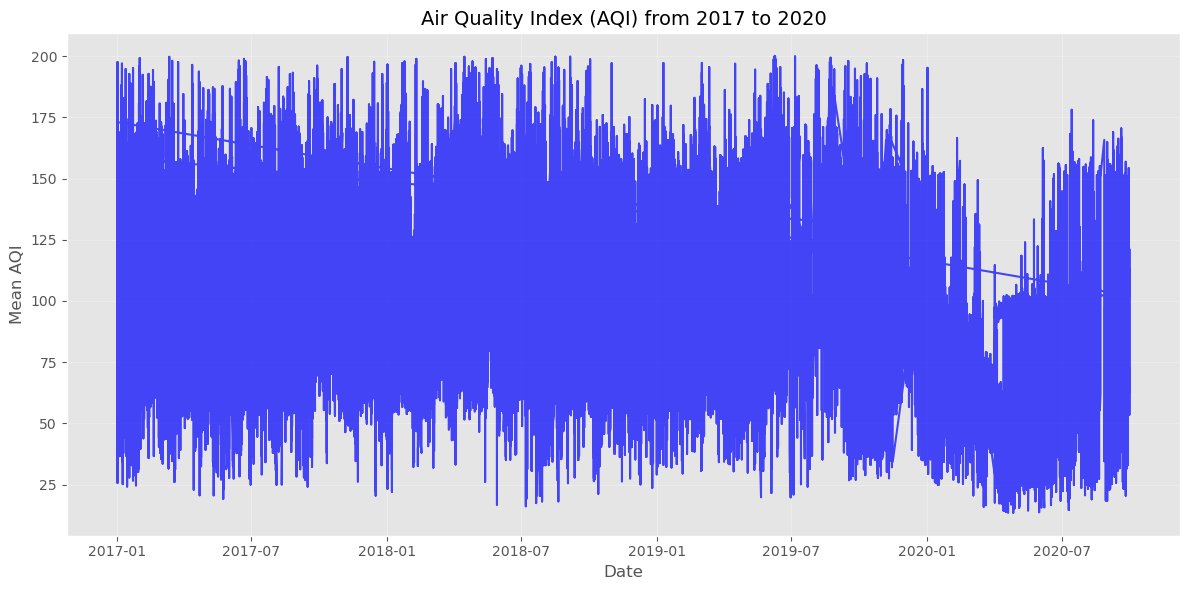

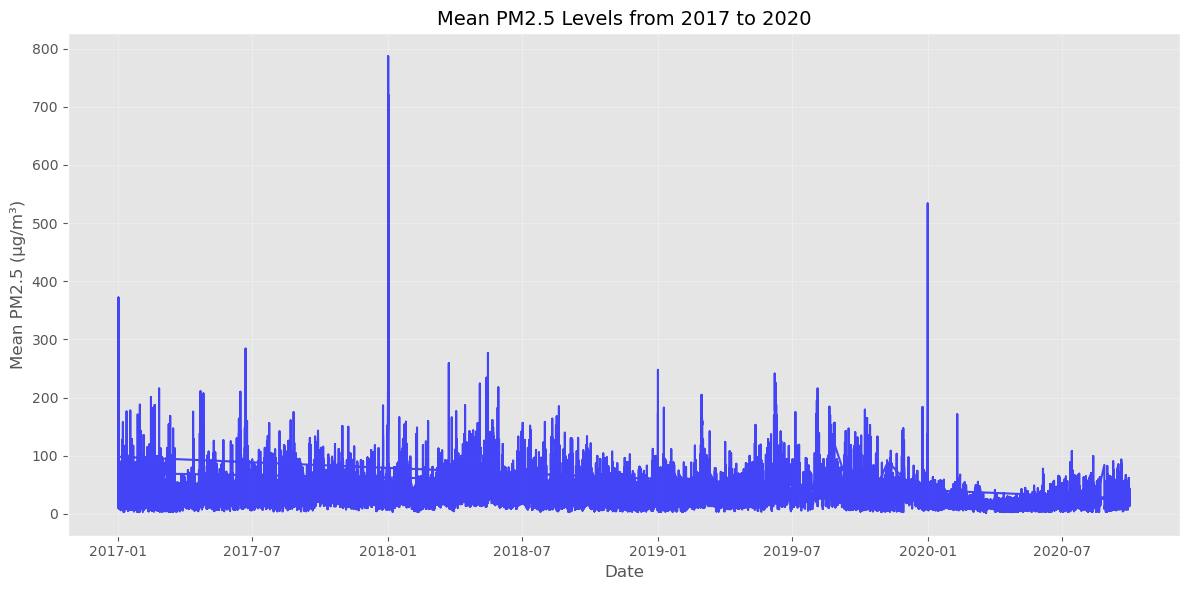

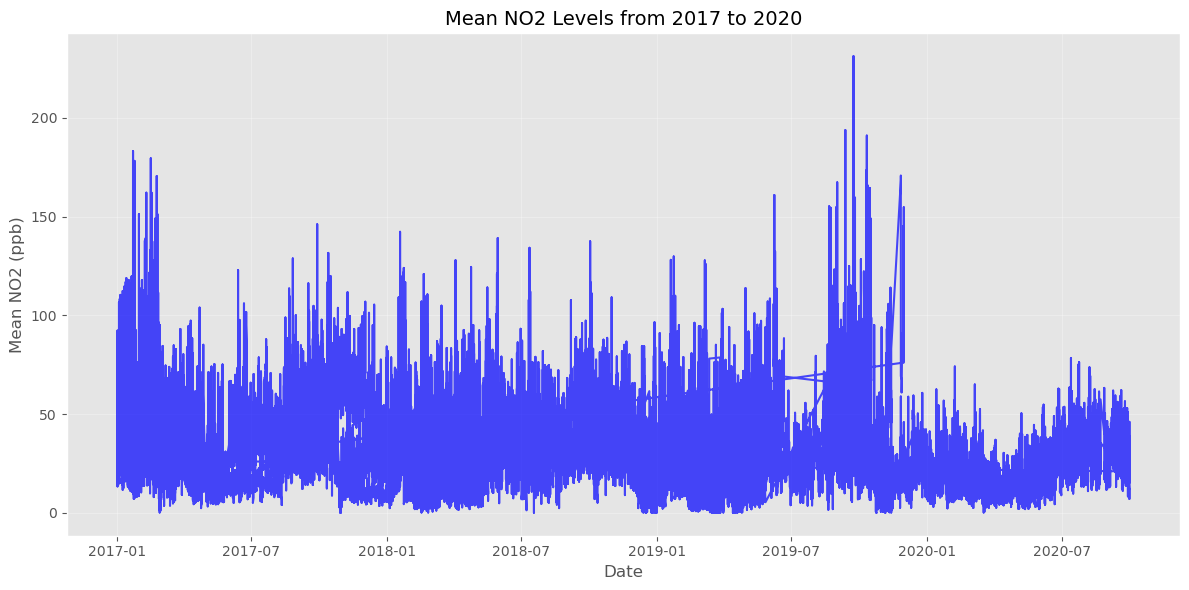

In [46]:
data = df_imputed  # Reemplaza con el nombre real del archivo si es un CSV

data["ANO"] = data["ANO"].astype(int)
data["MES"] = data["MES"].astype(int)
data["DIA"] = data["DIA"].astype(int)
# Crear la columna de fecha
data["Fecha"] = pd.to_datetime(data.rename(columns={"ANO": "year", "MES": "month", "DIA": "day"})[["year", "month", "day"]])


# Configurar el estilo de los gráficos
plt.style.use("ggplot")

# Gráfico (a): AQI
plt.figure(figsize=(12, 6))
plt.plot(data["Fecha"], data["AQI"], label="Mean AQI", color="blue", alpha=0.7)
plt.title("Air Quality Index (AQI) from 2017 to 2020", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean AQI", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico (b): PM2.5
plt.figure(figsize=(12, 6))
plt.plot(data["Fecha"], data["PM 2.5"], label="Mean PM2.5", color="blue", alpha=0.7)
plt.title("Mean PM2.5 Levels from 2017 to 2020", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean PM2.5 (µg/m³)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico (c): NO2
plt.figure(figsize=(12, 6))
plt.plot(data["Fecha"], data["NO2"], label="Mean NO2", color="blue", alpha=0.7)
plt.title("Mean NO2 Levels from 2017 to 2020", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean NO2 (ppb)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

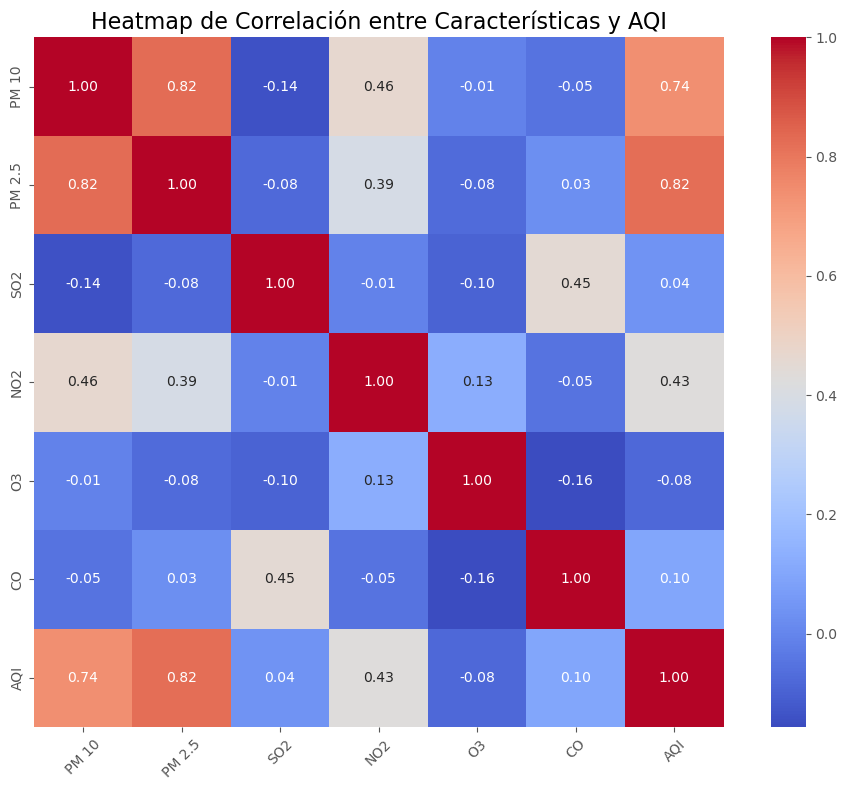

In [48]:
import seaborn as sns

features = ["PM 10", "PM 2.5", "SO2", "NO2", "O3", "CO", "AQI"]

# Cálculo de la matriz de correlación
correlation_matrix = data[features].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap de Correlación entre Características y AQI", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Generando la variable TARGET (SEGUN EL ARTICULO ESTO ES AL ULTIMO)
Primero, revisamos la distribución de la variable target de predicción, en este caso, la columna CHURN

In [ ]:
df.CHURN.value_counts()

,count
CHURN,
1,1672
2,1668
0,1660


Como solo queremos predecir si el cliente se va a ir o no, transformamos la variable para que sea binaria. Asi, se simplifica el problema a clasificación binaria. Creamos un nuevo atributo 'TARGET' y asignamos el valor 1 si el cliente se fué (valor 0 en la columna CHURN) y valor 0 si el cliente no se fue (valores 1 o 2 en CHURN).

In [ ]:
import numpy as np

# Función np.where(<condicion>, <valor cierto>, <valor falso>)
df['TARGET'] = np.where(df['CHURN']==0, 1, 0)

# Revisamos cómo queda la variable
df.TARGET.value_counts()

,count
TARGET,
0,3340
1,1660


In [ ]:
# Eliminamos la variable original ya que no la usaremos. Usaremos el TARGET
df = df.drop(columns = ['CHURN'])

In [ ]:
# Revisamos cómo queda el balance de las clases (en porcentajes)
(df.TARGET.value_counts()/df.shape[0])*100

,count
TARGET,
0,66.8
1,33.2


En este caso, se puede observar que existe un desbalance entre las clases (66% vs 33%). Este desbalance no es muy fuerte.

## Entendiendo Correlaciones entre Features
Revisamos correlaciones entre variables numéricas

In [ ]:
pd.set_option('display.precision', 2)  # setea la cantidad de decimales a mostrar en lo sucesivo en los dataframes

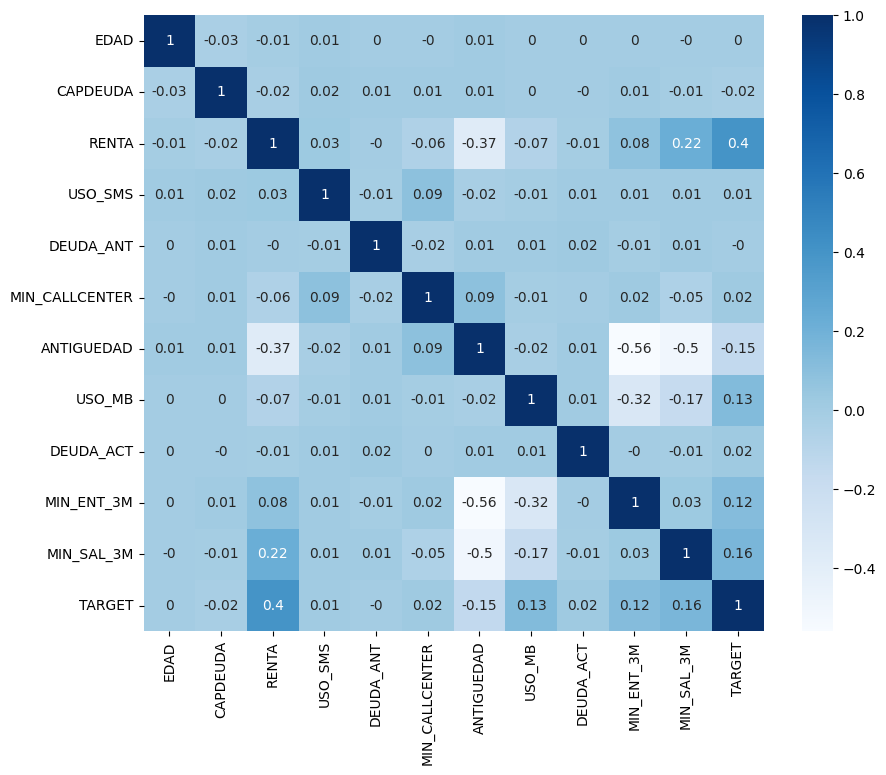

In [ ]:
import seaborn as sns

df_corr = df.corr(numeric_only=True).apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

Dado que no hay correlaciones fuertes, no eliminamos ninguna variable, ya que no hay redundancia entre ellas

## Codificamos las variables categoricas a numericas para su uso en ML

In [ ]:
# veamos los diferentes valores del feature DEPARTAMENTO
df.DEPARTAMENTO.value_counts()

,count
DEPARTAMENTO,
LIMA,1129
AREQUIPA,481
PASCO,480
CUSCO,478
AYACUCHO,319
TACNA,319
ICA,319
JUNIN,319
PUNO,160


In [ ]:
# Creamos 4 variables binarias (Norte, Sur, Centro y Lima) en base a la ubicacion del DEPARTAMENTO.
# Esta codificacion se llama one-hot encoding y es util para convertir categorias en valores numericos
df['LIMA'] = np.where(df.DEPARTAMENTO == 'LIMA', 1, 0)
df['SUR'] = np.where(df.DEPARTAMENTO.isin(['AREQUIPA', 'CUSCO', 'ICA', 'AYACUCHO', 'TACNA', 'MOQUEGUA', 'PUNO']), 1, 0)
df['CENTRO'] = np.where(df.DEPARTAMENTO.isin(['PASCO', 'JUNIN', 'UCAYALI']), 1, 0)
df['NORTE'] = np.where(df.DEPARTAMENTO.isin(['LA LIBERTAD', 'LORETO', 'PIURA', 'ANCASH']), 1, 0)

In [ ]:
# Borramos el feature DEPARTAMENTO, ya que solo se usará las variables binarias que acabamos de codificar
df = df.drop(columns = 'DEPARTAMENTO')

**Nota importante**: en este caso, esta forma de codificacion  resulta igual que usando dummies (One-hot encoding). El procedimiento es adecuado debido a que no hay una relación de orden entre los elementos. Si se hubiese usado "cat.codes" o "LabelEncoder()", los resultados en algunos algoritmos de ML (como los que dependen de distancias) podrian ser erróneos.

In [ ]:
df.sample(5)

,GENERO,EDAD,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,MIN_ENT_3M,MIN_SAL_3M,TARGET,LIMA,SUR,CENTRO,NORTE
CLIENT_ID,,,,,,,,,,,,,,,,,
2191,F,44,48.75,49.94,50.39,50.06,49.20,48.0,51.93,51.51,48.78,52.34,0,0,1,0,0
1095,M,52,50.26,50.39,47.83,50.06,47.13,48.0,51.65,49.99,48.25,52.19,0,0,1,0,0
3994,M,56,51.39,51.52,49.70,50.50,49.34,49.0,48.93,50.14,54.20,47.15,1,0,0,1,0
185,M,43,48.17,48.59,50.99,50.01,50.69,51.0,50.69,49.80,48.77,49.01,0,0,0,1,0
2482,F,42,50.18,48.49,50.35,51.53,47.36,51.0,50.96,50.60,47.45,49.94,0,1,0,0,0



Si bien el encoding se puede hacer manualmente, scikit-learn provee de un conjunto de Encoders que facilitan la tarea
```
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(df['DEPARTAMENTO'])
df['DEPARTAMENTO'] = label_encoder.transform(df['DEPARTAMENTO'])
```
Este codigo hubiera un codigo numerico a cada categoria distinta en DEPARTAMENTO (entre 0 a #categorias-1). No es recomendable esta codificacion ya que no hay una relacion de orden entre las categorias. (Mejor one-hot encoding)

También se puede usar "cat.codes" pero transforma valores categoricos a numéricos en orden alfabetico descendiente

```
df['DEPARTAMENTO'].cat.codes
```




In [ ]:
# Chequeamos si hay mas variables categoricas que necesitemos codificar a numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4947 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENERO          4947 non-null   object 
 1   EDAD            4947 non-null   int64  
 2   DEPARTAMENTO    4947 non-null   object 
 3   CAPDEUDA        4947 non-null   float64
 4   RENTA           4947 non-null   float64
 5   USO_SMS         4947 non-null   float64
 6   DEUDA_ANT       4947 non-null   float64
 7   MIN_CALLCENTER  4947 non-null   float64
 8   ANTIGUEDAD      4947 non-null   float64
 9   USO_MB          4947 non-null   float64
 10  DEUDA_ACT       4947 non-null   float64
 11  MIN_ENT_3M      4947 non-null   float64
 12  MIN_SAL_3M      4947 non-null   float64
 13  TARGET          4947 non-null   int64  
 14  LIMA            4947 non-null   int64  
 15  SUR             4947 non-null   int64  
 16  CENTRO          4947 non-null   int64  
 17  NORTE           4947 non-null   int64 

La variable GENERO es de tipo object, presumiblemente almacena categorias

In [ ]:
# Analicemos que categorias tiene la variable GENERO
df.GENERO.value_counts()

,count
GENERO,
F,2475
M,2472


In [ ]:
# Podemos binarizar GENERO usando dummies (One-hot encoding)
# Como son 3 categorias de Genereo, se crearán 3 features one-hot
df = pd.get_dummies(df, columns = ['GENERO'])

In [ ]:
df.sample(10)

,EDAD,DEPARTAMENTO,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,MIN_ENT_3M,MIN_SAL_3M,TARGET,LIMA,SUR,CENTRO,NORTE,GENERO_F,GENERO_M
CLIENT_ID,,,,,,,,,,,,,,,,,,,
4039,54,CUSCO,47.77,49.04,51.07,50.86,50.34,52.0,50.50,50.05,47.63,48.35,0,0,1,0,0,True,False
4550,32,ICA,50.67,51.03,49.11,49.43,50.42,50.0,48.97,51.03,50.29,51.54,1,0,1,0,0,False,True
4098,26,LIMA,50.01,49.99,50.10,50.42,51.63,51.0,53.03,50.07,49.94,50.35,0,1,0,0,0,False,True
490,18,TACNA,49.68,49.45,51.89,48.41,46.98,49.0,48.91,48.69,51.05,50.50,0,0,1,0,0,False,True
3388,22,CUSCO,49.15,50.95,50.70,50.87,49.68,54.0,51.00,52.53,47.97,49.49,1,0,1,0,0,False,True
4765,31,AYACUCHO,50.06,51.10,48.09,50.39,51.94,48.0,50.73,49.75,50.65,52.61,1,0,1,0,0,True,False
3830,50,ANCASH,47.34,50.05,50.77,50.09,49.13,48.0,47.05,50.27,53.12,51.02,1,0,0,0,1,True,False
1088,20,LIMA,50.85,53.25,52.06,50.77,49.04,50.0,48.15,50.95,49.84,49.84,1,1,0,0,0,False,True
1586,18,LIMA,51.62,49.26,52.47,50.76,51.84,48.0,52.69,51.89,48.63,53.14,1,1,0,0,0,False,True


In [ ]:
#dropeamos alguna de las 2 columnas 'GENERO_M' o GENERP_M, ya que contienen la misma informacion
df = df.drop(columns = ['GENERO_M'])

In [ ]:
# Finalmente, chequeamos que todas las variables sean numericas
df.dtypes

,0
EDAD,int64
DEPARTAMENTO,object
CAPDEUDA,float64
RENTA,float64
USO_SMS,float64
DEUDA_ANT,float64
MIN_CALLCENTER,float64
ANTIGUEDAD,float64
USO_MB,float64
DEUDA_ACT,float64


In [ ]:
# Salvamos la data procesada en un archivo, la cual esta lista para ser usada por algoritmos de ML
df.to_excel('DatosProcesados.xlsx')